<a href="https://colab.research.google.com/github/songhyeonjun/python-data/blob/master/%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8%EA%B0%80%EA%B2%A9%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 주요 라이브러리 import
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.metrics import roc_curve, roc_auc_score

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

In [12]:
# !apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [3]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=fontpath, size=9).get_name()
plt.rc('font', family=font_name) 
print(font_name)

NanumBarunGothic


In [4]:
# fm.rebuild()

Text(0.5, 1.0, '안녕')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


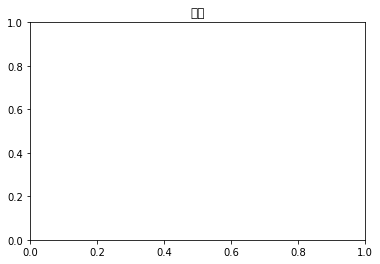

In [5]:
plt.title('안녕')

In [65]:
bitcoin_df = pd.read_csv("/content/block3.csv", names=['day', 'price'], encoding='utf-8')
bitcoin_df

,day,price
0,2020-12-09,18318.87
1,2020-12-10,18554.15
2,2020-12-11,18247.76
3,2020-12-12,18029.36
4,2020-12-13,18803.44
...,...,...
361,2021-12-05,49253.86
362,2021-12-06,49380.43
363,2021-12-07,50564.63
364,2021-12-08,50645.41


In [66]:
# 시계열데이터는 시간적인 순서가 중요!
# 미래에 대한 수치를 예측하는 것
# 최근 5일 치를 검증용 데이터로 사용하게 됨
# 5일치를 제외한 나머지 데이터를 훈련데이터로 사용함

In [67]:
bitcoin_train_df = bitcoin_df.iloc[:361]
bitcoin_train_df[:361]

,day,price
0,2020-12-09,18318.87
1,2020-12-10,18554.15
2,2020-12-11,18247.76
3,2020-12-12,18029.36
4,2020-12-13,18803.44
...,...,...
356,2021-11-30,57828.45
357,2021-12-01,57025.79
358,2021-12-02,57229.76
359,2021-12-03,56508.48


In [68]:
pd.to_datetime(bitcoin_train_df['day'])

0     2020-12-09
1     2020-12-10
2     2020-12-11
3     2020-12-12
4     2020-12-13
         ...    
356   2021-11-30
357   2021-12-01
358   2021-12-02
359   2021-12-03
360   2021-12-04
Name: day, Length: 361, dtype: datetime64[ns]

In [69]:
bitcoin_train_df['day'] = pd.to_datetime(bitcoin_train_df['day'])
bitcoin_train_df.index = bitcoin_train_df['day']

In [70]:
bitcoin_train_df.set_index('day', inplace=True)
bitcoin_train_df.head(2)

,price
day,
2020-12-09,18318.87
2020-12-10,18554.15


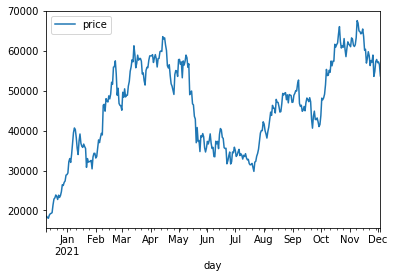

In [71]:
bitcoin_train_df.plot()

In [72]:
## ARiMA(아리마 모델) : 시계열의 유명한 모델
## AR + I + MA
## AR : 값들의 흐름의 특징을 가지고 예측하는 모델
## MA : 값들의 차이의 특징을 가지고 예측하는 모델
## I : AR + MA
## 월별, 계절별 trend도 에측할 수 있도록 해줌

In [73]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [74]:
model = ARIMA(bitcoin_train_df.price.values, order=(2, 1, 2))

In [75]:
model_fit = model.fit(trend = 'c', full_output=True)

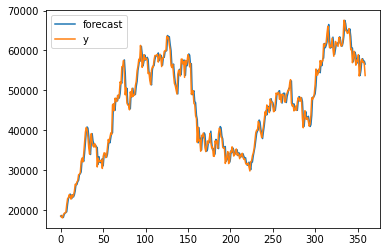

In [76]:
fig = model_fit.plot_predict()

In [77]:
forecast_data = model_fit.forecast(steps=5)
forecast_data

(array([53878.51041868, 53928.01418335, 53918.95039997, 53964.81109877,
        54116.40429724]),
 array([1882.64028629, 2611.29411865, 3183.32955089, 3707.1296496 ,
        4194.3311357 ]),
 array([[50188.60326172, 57568.41757564],
        [48809.97175776, 59046.05660894],
        [47679.73912929, 60158.16167064],
        [46698.97049954, 61230.651698  ],
        [45895.66633203, 62337.14226245]]))

In [78]:
pred_y = forecast_data[0].tolist()
pred_y

[53878.510418679354,
 53928.014183351304,
 53918.95039996678,
 53964.811098770224,
 54116.404297240966]

In [79]:
bitcoin_test_df = bitcoin_df[361:]
bitcoin_test_df

,day,price
361,2021-12-05,49253.86
362,2021-12-06,49380.43
363,2021-12-07,50564.63
364,2021-12-08,50645.41
365,2021-12-09,50511.12


In [80]:
test_y = bitcoin_test_df.price.values.tolist()
test_y

[49253.86, 49380.43, 50564.63, 50645.41, 50511.12]

In [81]:
r2_score(test_y, pred_y)

-39.44916401714005

In [202]:
year_1_mse = mean_squared_error(test_y, pred_y)
year_1_mse

15467175.45274812

In [83]:
### 3년치 가지고 해보고, 최근의 5일을 맞춰보기

In [136]:
df = pd.read_csv("/content/market-price.csv", encoding='utf-8')
df

,Timestamp,market-price
0,2019-04-21 00:00:00,5309.28
1,2019-04-22 00:00:00,5281.83
2,2019-04-23 00:00:00,5377.19
3,2019-04-24 00:00:00,5518.16
4,2019-04-25 00:00:00,5434.19
...,...,...
1090,2022-04-15 00:00:00,39939.90
1091,2022-04-16 00:00:00,40566.20
1092,2022-04-17 00:00:00,40388.78
1093,2022-04-18 00:00:00,39711.45


In [137]:
df.rename(columns={'market-price':'price'}, inplace=True)

In [138]:
train_df = df.iloc[:1090]
train_df

,Timestamp,price
0,2019-04-21 00:00:00,5309.28
1,2019-04-22 00:00:00,5281.83
2,2019-04-23 00:00:00,5377.19
3,2019-04-24 00:00:00,5518.16
4,2019-04-25 00:00:00,5434.19
...,...,...
1085,2022-04-10 00:00:00,42787.69
1086,2022-04-11 00:00:00,42144.23
1087,2022-04-12 00:00:00,39488.62
1088,2022-04-13 00:00:00,40102.20


In [139]:
pd.to_datetime(train_df['Timestamp'])

0      2019-04-21
1      2019-04-22
2      2019-04-23
3      2019-04-24
4      2019-04-25
          ...    
1085   2022-04-10
1086   2022-04-11
1087   2022-04-12
1088   2022-04-13
1089   2022-04-14
Name: Timestamp, Length: 1090, dtype: datetime64[ns]

In [140]:
train_df['Timestamp'] = pd.to_datetime(train_df['Timestamp'])
train_df.index = train_df['Timestamp']

In [141]:
train_df.set_index('Timestamp', inplace=True)
train_df

,price
Timestamp,
2019-04-21,5309.28
2019-04-22,5281.83
2019-04-23,5377.19
2019-04-24,5518.16
2019-04-25,5434.19
...,...
2022-04-10,42787.69
2022-04-11,42144.23
2022-04-12,39488.62


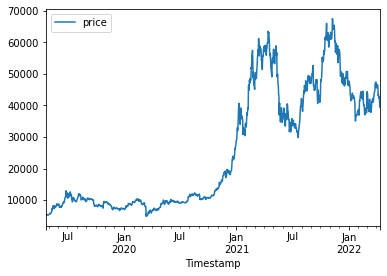

In [142]:
train_df.plot()

In [143]:
model2 = ARIMA(train_df.price.values, order=(2, 1, 2))

In [144]:
model_fit2 = model2.fit(trend = 'c', full_output=True)

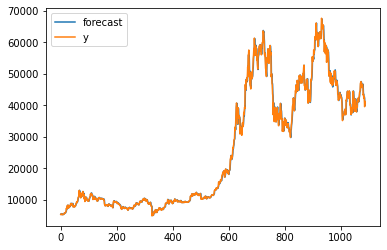

In [145]:
fig2 = model_fit.plot_predict()

In [146]:
forecast_data2 = model_fit2.forecast(steps=5)
forecast_data2

(array([40984.14345285, 40754.48254665, 40758.41212892, 41018.39279628,
        41266.80927788]),
 array([1230.66936271, 1712.68033542, 2076.4544897 , 2397.14834542,
        2695.98442384]),
 array([[38572.07582507, 43396.21108063],
        [37397.69077219, 44111.2743211 ],
        [36688.63611357, 44828.18814428],
        [36320.06837366, 45716.7172189 ],
        [35982.77690427, 46550.84165149]]))

In [154]:
pred_y2 = forecast_data2[0].tolist()
pred_y2

[40984.143452851255,
 40754.48254664857,
 40758.41212892331,
 41018.39279628061,
 41266.80927788353]

In [155]:
test_df2 = df[1090:]
test_df2

,Timestamp,price
1090,2022-04-15 00:00:00,39939.90
1091,2022-04-16 00:00:00,40566.20
1092,2022-04-17 00:00:00,40388.78
1093,2022-04-18 00:00:00,39711.45
1094,2022-04-19 00:00:00,40805.72


In [156]:
test_y2 = test_df2.price.values.tolist()
test_y2

[39939.9, 40566.2, 40388.78, 39711.45, 40805.72]

In [157]:
r2_score(test_y2, pred_y2)

-2.9347018458466247

In [204]:
year_5_mse = mean_squared_error(test_y2, pred_y2)
year_5_mse

636645.0823713003

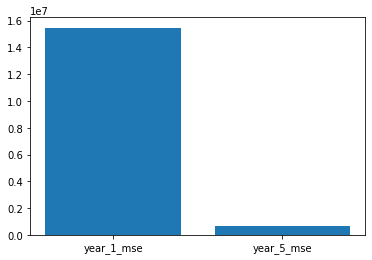

In [205]:
x = np.arange(2)
plt.bar(x, height= [
                    year_1_mse,
                    year_5_mse
            ])
plt.xticks(x, ['year_1_mse', 
               'year_5_mse']);

In [163]:
from fbprophet import Prophet

In [166]:
bitcoin5_df_fb = pd.read_csv("/content/market-price.csv", encoding='utf-8')
bitcoin5_df_fb.head()

,Timestamp,market-price
0,2019-04-21 00:00:00,5309.28
1,2019-04-22 00:00:00,5281.83
2,2019-04-23 00:00:00,5377.19
3,2019-04-24 00:00:00,5518.16
4,2019-04-25 00:00:00,5434.19


In [169]:
bitcoin5_df_fb.columns = (['ds', 'y'])

In [171]:
bitcoin5_df_fb.head(2)

,ds,y
0,2019-04-21 00:00:00,5309.28
1,2019-04-22 00:00:00,5281.83


In [175]:
phophet = Prophet(
    seasonality_mode = 'multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    changepoint_prior_scale=0.5
)
phophet.fit(bitcoin5_df_fb)

In [176]:
future_data = phophet.make_future_dataframe(periods=5, freq='d')
forecast_data = phophet.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1095,2022-04-20,40415.912845,38270.160429,42601.291588
1096,2022-04-21,40041.204895,38099.681535,42303.734831
1097,2022-04-22,39421.081324,37227.441178,41548.217408
1098,2022-04-23,38888.912010,36610.234794,41044.877485
1099,2022-04-24,38275.735752,36051.810333,40394.280676


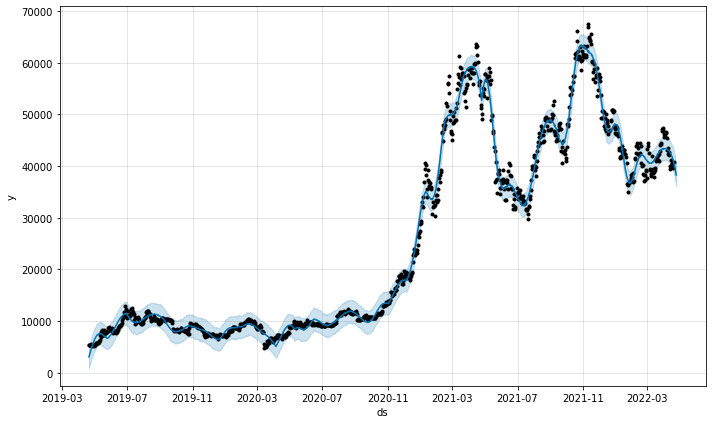

In [178]:
fig1 = phophet.plot(forecast_data)

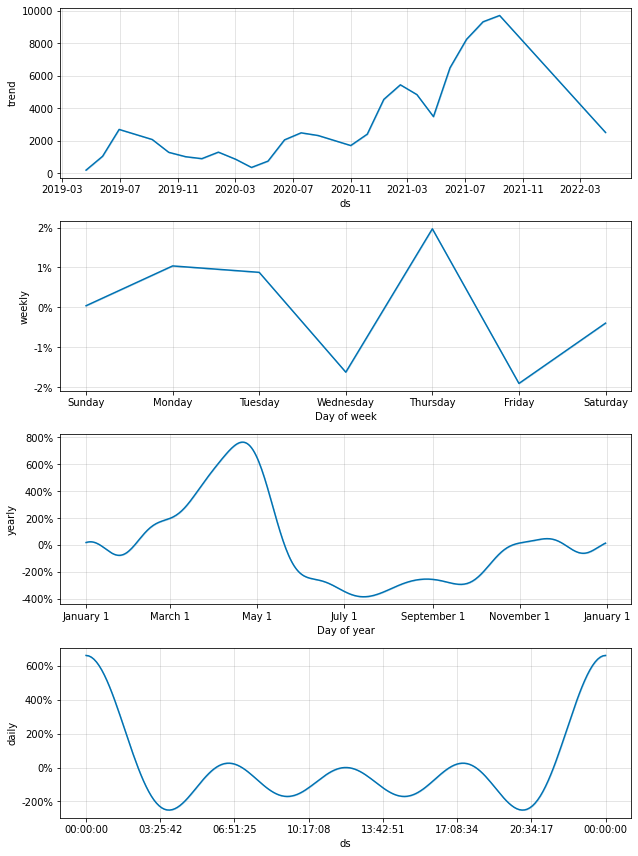

In [180]:
fig2 = phophet.plot_components(forecast_data)

In [186]:
# mse를 구해보기
bitcoin5_df_fb.tail(3)

,ds,y
1092,2022-04-17 00:00:00,40388.78
1093,2022-04-18 00:00:00,39711.45
1094,2022-04-19 00:00:00,40805.72


In [189]:
bitcoin_df_5_fb2_train = bitcoin5_df_fb.iloc[:1090]
bitcoin_df_5_fb2_train.tail(3)

,ds,y
1087,2022-04-12 00:00:00,39488.62
1088,2022-04-13 00:00:00,40102.20
1089,2022-04-14 00:00:00,41148.06


In [192]:
bitcoin5_df_fb2_test = bitcoin5_df_fb.iloc[1090:]
bitcoin5_df_fb2_test.tail(5)

,ds,y
1090,2022-04-15 00:00:00,39939.90
1091,2022-04-16 00:00:00,40566.20
1092,2022-04-17 00:00:00,40388.78
1093,2022-04-18 00:00:00,39711.45
1094,2022-04-19 00:00:00,40805.72


In [194]:
bitcoin_df_5_fb2_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      1090 non-null   object 
 1   y       1090 non-null   float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [195]:
prophet2 = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)
prophet2.fit(bitcoin_df_5_fb2_train)

In [197]:
future_data2 = prophet2.make_future_dataframe(periods = 5, freq = 'd')
forecast_data4 = phophet.predict(future_data2)
forecast_data4[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1090,2022-04-15,42083.041861,39742.437366,44167.652199
1091,2022-04-16,41869.446376,39637.863371,44192.455653
1092,2022-04-17,41588.829059,39355.064618,43883.333702
1093,2022-04-18,41283.366794,39093.890694,43349.830810
1094,2022-04-19,40903.400842,38748.250547,42916.083491


In [199]:
result_df_3 = pd.DataFrame({
    'day' : bitcoin5_df_fb2_test['ds'],
    'real_data' : bitcoin5_df_fb2_test['y'],
    'pred_data' : forecast_data4['yhat'].tail(5)
})
result_df_3

,day,real_data,pred_data
1090,2022-04-15 00:00:00,39939.90,42083.041861
1091,2022-04-16 00:00:00,40566.20,41869.446376
1092,2022-04-17 00:00:00,40388.78,41588.829059
1093,2022-04-18 00:00:00,39711.45,41283.366794
1094,2022-04-19 00:00:00,40805.72,40903.400842


In [200]:
pb_mse = mean_squared_error(result_df_3['real_data'], result_df_3['pred_data'])
pb_mse

2042417.969926665

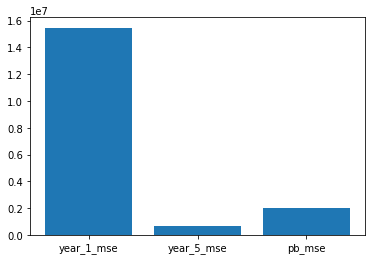

In [206]:
x = np.arange(3)
plt.bar(x, height= [
                    year_1_mse,
                    year_5_mse,
                    pb_mse
            ])
plt.xticks(x, ['year_1_mse', 
               'year_5_mse',
               'pb_mse'
               ]);